In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

dataset = pd.read_csv('datasets/Police_Arrests_20240702.csv')

dataset

,ID Reference Number,Subject's race,Subject's gender,Subject's age,Ethnicity,District of occurrence,Adjacent to School,Assigned Division,Assigned Bureau,Event Date/Time
0,1,Asian,Male,43,NON-HISPANIC,6.0,0,TOD,FSB,1/1/2021 1:07
1,2,Black/African American,Male,23,NON-HISPANIC,1.0,0,RCPD,NaN,1/1/2021 0:52
2,3,Black/African American,Male,18,NON-HISPANIC,1.0,0,RCPD,NaN,1/1/2021 0:52
3,4,Black/African American,Male,21,NON-HISPANIC,1.0,0,RCPD,NaN,1/1/2021 0:52
4,5,White,Female,38,HISPANIC,4.0,0,TOD,FSB,1/1/2021 3:00
...,...,...,...,...,...,...,...,...,...,...
23505,23506,Black/African American,Male,30,NON-HISPANIC,3.0,0,3D,PSB,6/30/2024 11:00
23506,23507,Asian,Male,60,NON-HISPANIC,3.0,0,3D,PSB,7/1/2024 7:27
23507,23508,White,Male,22,HISPANIC,4.0,0,2D,PSB,6/29/2024 2:42
23508,23509,White,Male,25,HISPANIC,4.0,0,2D,PSB,6/29/2024 2:42


# Preprocesamiento

Se procederá a realizar el preprocesamiento comenzando con que en la parte estrucural no se tienen cambios. Luego, por la parte funcional si se harán algunos cambios. Estos son:

- Se pudiese considerar un mapeo de variables categoricas a número enteros de las columnas "Subjec's race", "Subjec's gender",  "Ethnicity", "Assingned Division" y "Assigned Bureau", pero en este caso es más útil mantenerlas de esta manera.
- Se cambiará el tipo de dato de la columna "Event Date/Time" por datetime para mayor usabilidad en el análisis.
- También se comprobará el número de nulos por columna para saber si es útil realizar sustitución de valores nulos.

In [2]:
dataset['Event Date/Time'] = pd.to_datetime(dataset['Event Date/Time'])

print(dataset["Subject's race"].unique())
print(dataset['Ethnicity'].unique())
print(dataset['Assigned Division'].unique())
print(dataset['Assigned Bureau'].unique())

race_categories_map = { 'Unknown': 0, 'Asian': 1, 'Black/African American': 2, 'White': 3, 'American Indian/ALSK Natv': 4, 'Hawaiian/Pacific Islander': 5 }
gender_categories_map = { 'Female': 0, 'Male': 1 }
ethnicity_categories_map = { 'NON-HISPANIC': 0, 'HISPANIC': 1 }
division_categories_map = { 'TOD': 0, 'RCPD': 1, 'TPPD': 2, 'GPD': 3, '4D': 4, '3D': 5, '5D': 6, '6D': 7, 'IMTD': 8, '2D': 9, '1D': 10, 'SVID': 11,
 'CID': 12, 'MCFM': 13, 'SID': 14, 'PSTA': 15, 'MCSO': 16, 'MCD': 17, 'SOD': 18, 'CED': 19, 'PSCC': 20, 'FSB': 21, 'PERS': 22, 'ISB': 23 }
bureau_categories_map = { 'FSB': 0, 'PSB': 1, 'MSB': 2, 'ISB': 3 }

dataset["Subject's race"] = dataset["Subject's race"].map(race_categories_map)
dataset["Subject's gender"] = dataset["Subject's gender"].map(gender_categories_map)
dataset['Ethnicity'] = dataset['Ethnicity'].map(ethnicity_categories_map)
dataset['Assigned Division'] = dataset['Assigned Division'].map(division_categories_map)
dataset['Assigned Bureau'] = dataset['Assigned Bureau'].map(bureau_categories_map)


print(dataset)
print(dataset.isnull().sum())

['Asian' 'Black/African American' 'White' 'Unknown'
 'American Indian/ALSK Natv' 'Hawaiian/Pacific Islander']
['NON-HISPANIC' 'HISPANIC']
['TOD' 'RCPD' 'TPPD' 'GPD' '4D' '3D' '5D' '6D' 'IMTD' '2D' '1D' 'SVID'
 'CID' 'MCFM' 'SID' 'PSTA' nan 'MCSO' 'MCD' 'SOD' 'CED' 'PSCC' 'FSB'
 'PERS' 'ISB']
['FSB' nan 'PSB' 'MSB' 'ISB']
       ID Reference Number   Subject's race  Subject's gender  Subject's age  \
0                         1               1                 1             43   
1                         2               2                 1             23   
2                         3               2                 1             18   
3                         4               2                 1             21   
4                         5               3                 0             38   
...                     ...             ...               ...            ...   
23505                 23506               2                 1             30   
23506                 23507          

Como se observar que no existen tantos valores nulos en las columnas del conjunto no se procederá a hacer sustitución de estos. 

Luego, se pueden destacar varias aspectos generales del conjunto de datos.

In [3]:
dataset.describe()

,ID Reference Number,Subject's race,Subject's gender,Subject's age,Ethnicity,District of occurrence,Adjacent to School,Assigned Division,Assigned Bureau,Event Date/Time
count,23510.00000,23510.000000,23510.000000,23510.000000,23510.000000,23408.000000,23510.000000,23381.000000,18851.000000,23510
mean,11755.50000,2.451467,0.789749,31.813143,0.304211,3.989192,0.085155,5.446602,1.020529,2022-11-01 01:32:00.372607232
min,1.00000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2021-01-01 00:00:00
25%,5878.25000,2.000000,1.000000,22.000000,0.000000,3.000000,0.000000,4.000000,1.000000,2021-12-31 16:10:45
50%,11755.50000,2.000000,1.000000,30.000000,0.000000,4.000000,0.000000,5.000000,1.000000,2022-11-18 07:04:00
75%,17632.75000,3.000000,1.000000,39.000000,1.000000,5.000000,0.000000,7.000000,1.000000,2023-09-05 21:43:00
max,23510.00000,5.000000,1.000000,99.000000,1.000000,8.000000,1.000000,23.000000,3.000000,2024-07-01 16:23:00
std,6786.89675,0.572459,0.407495,12.946909,0.460082,1.748587,0.279119,3.306334,0.488545,NaN


- La edad de las personas está entre los 22 y 99 años. Pudiese considerarse 99 años como un valor anómalo, pero si lo aplicamos a la realidad, no es tan descabellado pensar en que una persona de 99 años pueda ser arrestada.
- De lo anterior de puede concluir que no hubo arrestos de menores.
- El 50% de las personas involucradas tiene 30 o menos años.
- El 50% de las personas involucradas pertencen a las razas 'Asian' y 'Black/African American'.
- El porcentaje general de las edades de los sujetos es de casi 32 años, un dato bastante curioso que puede indicar que es común que las personas alrededor de esta edad pueden ser arrestadas comunmente. 

# EDA

### 1. ¿Qué división está asignada a más arrestos?

En esta primera observación, se propone un agrupamiento por división y luego un conteo de elementos por grupo, además del uso de gráficas de barras.

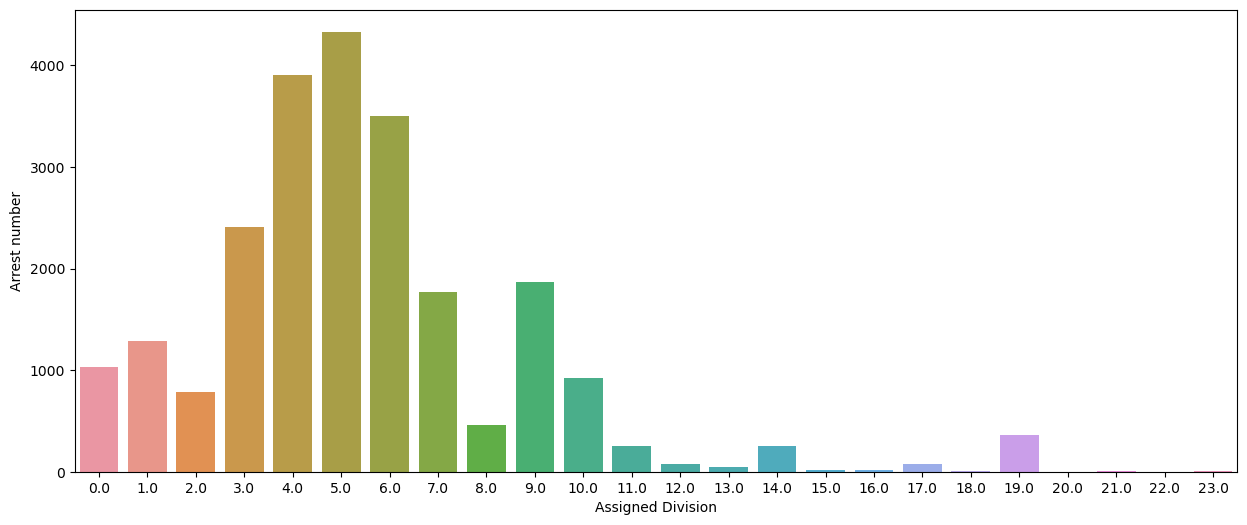

In [4]:
filtered_dataset = dataset[["Subject's race", 'Assigned Division']]

filtered_dataset = filtered_dataset.groupby('Assigned Division').size().reset_index()

filtered_dataset.columns = ['Assigned Division', 'Arrest number']

plt.figure(figsize=(15, 6))

sb.barplot(filtered_dataset, x="Assigned Division", y="Arrest number")

plt.xlabel('Assigned Division')

plt.ylabel('Arrest number')

plt.show()

Como se puede observar en la gráfica, la división 5, correspondiente al nombre '3D' es la división que está asignada a más casos, teniendo 4331.

### 2. ¿Cuál boreau está asignado a más casos? 

En la seguna observación, se puede aplicar un agrupamiento por Bureau y luego un conteo de elementos por grupo, una operación bastante sencilla pero significativa.

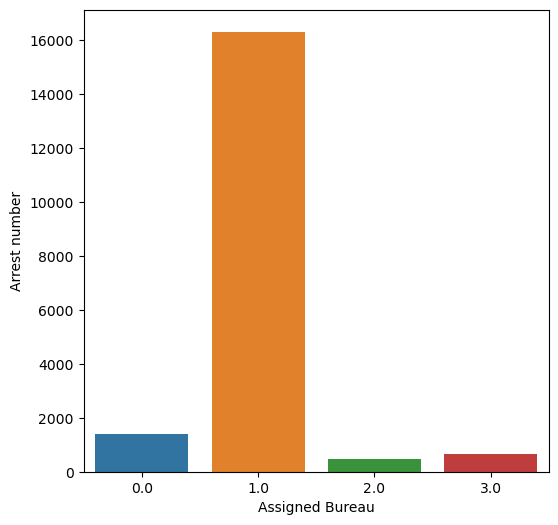

In [5]:
filtered_dataset = dataset[["Subject's race", 'Assigned Bureau']]

filtered_dataset = filtered_dataset.groupby('Assigned Bureau').size().reset_index()

filtered_dataset.columns = ['Assigned Bureau', 'Arrest number']

plt.figure(figsize=(6, 6))

sb.barplot(filtered_dataset, x="Assigned Bureau", y="Arrest number")

plt.xlabel('Assigned Bureau')

plt.ylabel('Arrest number')

plt.show()

En la gráfica, se puede observar que el Bureau 1 el que está asignado a más casos. Este corresponde al nombre de "PSB".

### 3. ¿Cuál es el número de casos de personas de etnia hispánica por acada género?   

En la tercera observación, es lógico usar un filtro por etnia hispánica, lueog un agrupamiento por género y luego un conteo de elementos de grupos para obtener el número de arrestos agrupados. Se propone el uso de una gráfica de barras. 

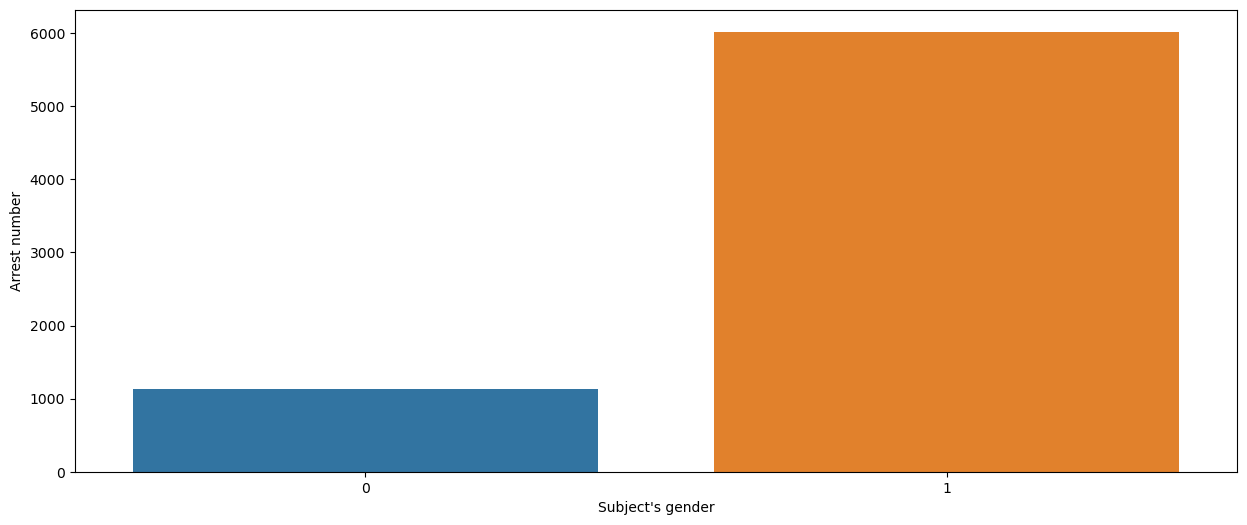

   Subject's gender  Arrest number
0                 0           1133
1                 1           6019


In [6]:
filtered_dataset = dataset[['Ethnicity', "Subject's gender"]].loc[dataset['Ethnicity'] == 1]

filtered_dataset = filtered_dataset.groupby("Subject's gender").size().reset_index()

filtered_dataset.columns = ["Subject's gender", 'Arrest number']

plt.figure(figsize=(15, 6))

sb.barplot(filtered_dataset, x="Subject's gender", y="Arrest number")

plt.xlabel("Subject's gender")

plt.ylabel('Arrest number')

plt.show()

print(filtered_dataset)

En la gráfica se puede observar que se existe una gran diferencia entre los sujetos de género masculino y femenino hispánicos que fueron arrestados, teniendo 1133 mujeres y 6019 hombres.

### 4. ¿Cuál es la cantidad de arrestos por año de personas de etnia no hispánica? 

Acá, puede usarse un filtrado por etnia no hispánica, así como un agrupamiento por año. Para este caso es recomendable usar una gráfica de lineas. 

/home/aaron/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/aaron/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


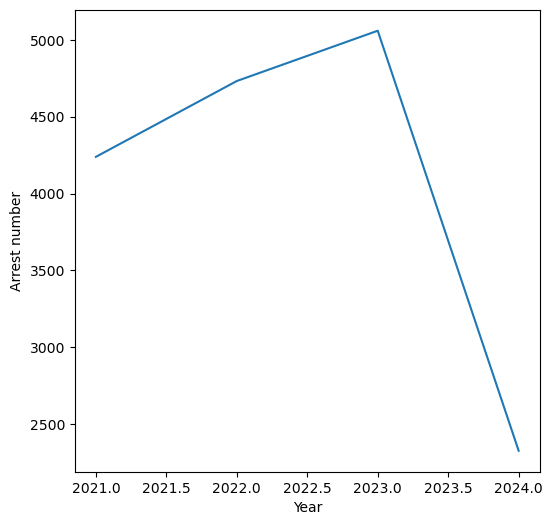

   Year  Arrest number
0  2021           4239
1  2022           4732
2  2023           5059
3  2024           2328


In [7]:
filtered_dataset = dataset[['Ethnicity', "Event Date/Time"]].loc[dataset['Ethnicity'] == 0]

filtered_dataset = filtered_dataset.groupby(filtered_dataset['Event Date/Time'].dt.year).size().reset_index()

filtered_dataset.columns = ['Year', 'Arrest number']

plt.figure(figsize=(6, 6))

sb.lineplot(filtered_dataset, x="Year", y="Arrest number")

plt.xlabel("Year")

plt.ylabel('Arrest number')

plt.show()

print(filtered_dataset)

Como se puede observar de la gráfica anterior, se tiene que en el 2021 hubieron 4239 arrestos, en el 2022 hubieron 4732, en el 2023 hubieron 5059 y en el 2024 han arrestado a 2328 personas de etnia no hispánica.  

### 5. ¿Cuál es la edad promedio en las personas asociadas al caso suelen ser arrestadas por distrito?

En esta observación, se puede usar un agrupamiento por distrito y edad así como una gráfica de barras para visualizar los valores de una buena manera.

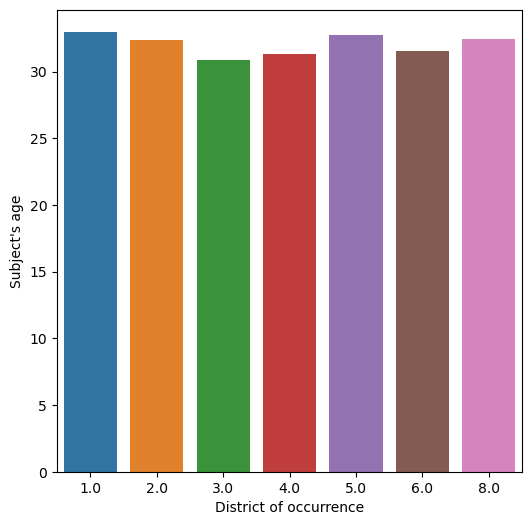

   District of occurrence  Subject's age
0                     1.0      32.989256
1                     2.0      32.404372
2                     3.0      30.832288
3                     4.0      31.321280
4                     5.0      32.735864
5                     6.0      31.543808
6                     8.0      32.459288


In [8]:
filtered_dataset = dataset[["Subject's age", 'District of occurrence']].groupby('District of occurrence')["Subject's age"].mean().reset_index()

plt.figure(figsize=(6, 6))

sb.barplot(filtered_dataset, x="District of occurrence", y="Subject's age")

plt.xlabel("District of occurrence")

plt.ylabel("Subject's age")

plt.show()

print(filtered_dataset)

De esta gráfica se puede destacar que el distrito 3 tiene el promedio de edades más bajo y el distrito 1 tiene el promedio de edades más alto. Pero lo que más llama la atención de esto, es que los promedios son muy consistentes, pues estos están entre 30 y 33 años. Esto puede indicar que muy común que las personas de esa edad sean arrestadas en cualquiera de los distritos. 

### 6. ¿Qué cantidad de arrestos ocurren cerca de un colegio y cuales no en los años 2023 y 2024?

Para este caso, también puede usarse un agrupamiento por años, así como un filtrado de años mayores o iguales a 2023 (y no menores o iguales a 2024 porque se sabe que el máximo año de las observaciones es el 2024). Como gráfica se usará una de lineas por con base a tres variables.

   Year  Adjacent to School  Arrest number
4  2023                   0           6685
5  2023                   1            668
6  2024                   0           3170
7  2024                   1            367


/home/aaron/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/aaron/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


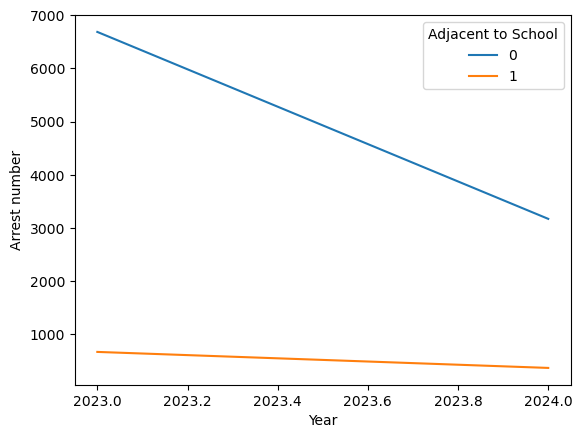

In [9]:
filtered_dataset = dataset[['Event Date/Time', 'Adjacent to School']].groupby([dataset['Event Date/Time'].dt.year, dataset['Adjacent to School']]).size().reset_index()

filtered_dataset = filtered_dataset.loc[filtered_dataset['Event Date/Time'] >= 2023]

filtered_dataset.columns = ['Year', 'Adjacent to School', 'Arrest number']

print(filtered_dataset)

sb.lineplot(filtered_dataset, x="Year", y="Arrest number", hue="Adjacent to School")

plt.xlabel("Year")

plt.ylabel("Arrest number")

plt.show()


Como se puede visualizar en la gráfica, la cantidad de arrestos que ocurren cerca de escuelas es mucho menor (afortunadamente) que los que no entre los años 2023 y 2024. Por suerte, también puede observase que existe una relación positiva entre las dos variable es incluso los dos conjuntos de datos, pues los arrestos tienden a bajar hacia el año 2024.

### 7. Comparación de arrestos por distritos y por género.

Para este caso, se puede usar un agrupamiento por raza y distrito ordenadamente, y luego un conteo de elementos de los grupos. Para la visualización se puede usar una gráfica de lineas dependiente de tres variables.

/home/aaron/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/aaron/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


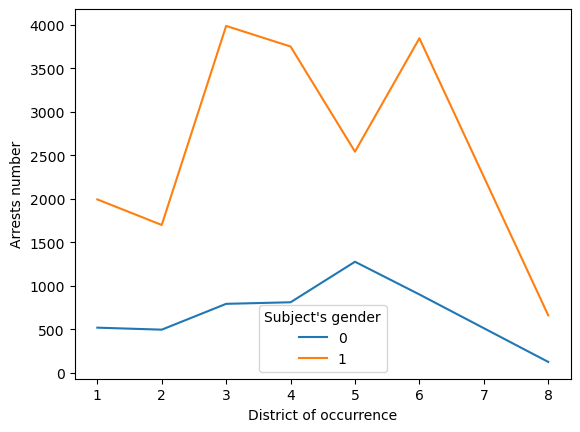

    Subject's gender  District of occurrence  Arrests number
0                  0                     1.0             519
1                  0                     2.0             496
2                  0                     3.0             793
3                  0                     4.0             811
4                  0                     5.0            1277
5                  0                     6.0             901
6                  0                     8.0             125
7                  1                     1.0            1994
8                  1                     2.0            1700
9                  1                     3.0            3989
10                 1                     4.0            3752
11                 1                     5.0            2543
12                 1                     6.0            3847
13                 1                     8.0             661


In [10]:
filtered_dataset = dataset[["Subject's gender", 'District of occurrence']].groupby(["Subject's gender", 'District of occurrence']).size().reset_index()

filtered_dataset.columns = ["Subject's gender", 'District of occurrence', 'Arrests number'] 

filtered_dataset

sb.lineplot(filtered_dataset, x="District of occurrence", y="Arrests number", hue="Subject's gender")

plt.xlabel("District of occurrence")

plt.ylabel("Arrests number")

plt.show()

print(filtered_dataset)

De la gráfica se puede concluir que la cantidad de hombres arrestado es mucho mayor por distrito, pues la cantidad en ambos casos ni si quiera se acerca. Tambén se puede decir que la cantidad de arrestos de hombres es bastante variable entre distritos, y por su parte, la cantidad de arrestos de mujeres suele ser constante y solo tiene un pico. Por suerte, en el distrito 9 se tiene una menor cantidad de arrestos que en cualquier otro. 

Otro dato curioso, es que el distrito 3 y el 6 son los que más arrestos tienen, siendo el 3 el que predonima 4782 y el 6 con 4748. Además de esto, no existe un distrito 7 y por eso las curvas coinciden en dirección en el tramo que le correspondería a este. 

### 8. ¿Cuál es la cantidad de arrestos por razas?

Se puede realizar un agrupamiento por raza para obtener esta oberservación, así como un conteo de grupo esta vez que se tenga lo anterior agrupado. 

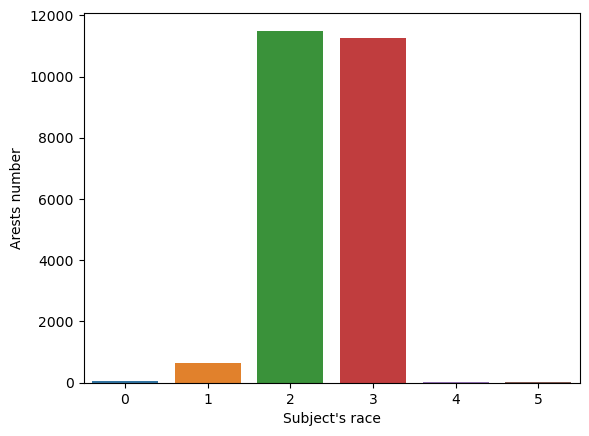

,Subject's race,Arests number
0,0,71
1,1,632
2,2,11495
3,3,11256
4,4,36
5,5,20


In [11]:
filtered_dataset = dataset[["Subject's race"]].groupby("Subject's race").size().reset_index()

filtered_dataset.columns = ["Subject's race", 'Arests number']

sb.barplot(filtered_dataset, x="Subject's race", y="Arests number")

plt.xlabel("Subject's race")

plt.ylabel("Arests number")

plt.show()

filtered_dataset

En esta observación se puede apreciar que existe una enorme diferencia de personas de las razas 'Black/African American' y 'White', lo cual basado en la descripción del dataset es una realidad en el condado al que este proviene.

# Conclusión

El dataset tiene hechos comprobables, es consistente y se puede decir que están apegados a la realidad (es decir, que esto es comprobable en las observaciones realizadas). El dataset está bastante completo en línea generales y es bastante usable a nivel de análisis. 

En cuanto al significado de sus datos, pues según del dataset ocurren muchos arrestos de personas de la raza 2 y 3, siendo la 2 correspondiente a 'Black/African American' y la 3 a 'White', lo que es una realidad en los estados unidos y considerando que estos datos pertenecen a un condado de Washington DC llamado Montgomery.